In [247]:
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns; sns.set()
sns.set_style("whitegrid")
sns.set_context("poster")


In [248]:
df = pd.read_csv("C:/Users/User/Downloads/bank.csv")
df = df.dropna()

In [249]:
#df['deposit']
df["deposit"].replace( 'no',0,inplace=True)
df["deposit"].replace( 'yes',1,inplace=True)

In [250]:
df.isnull().values.any()

False

In [251]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1


In [252]:
df.shape

(11162, 17)

In [253]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,deposit
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557,0.473840
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007,0.499338
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000,1.000000


In [254]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [255]:
Y = df["deposit"]
cat_X = [i for i in df.columns if i!="deposit"]
X = df[cat_X]

In [256]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown


In [257]:
import numpy as np
for col in df:
    b, c = np.unique(df[col], return_inverse=True) 
    df[col] = c

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,41,0,1,1,0,2288,1,0,2,4,8,1021,0,0,0,3,1
1,38,0,1,1,0,469,0,0,2,4,8,1283,0,0,0,3,1
2,23,9,1,1,0,1618,1,0,2,4,8,1246,0,0,0,3,1
3,37,7,1,1,0,2356,1,0,2,4,8,577,0,0,0,3,1
4,36,0,1,2,0,608,0,0,2,4,8,671,1,0,0,3,1


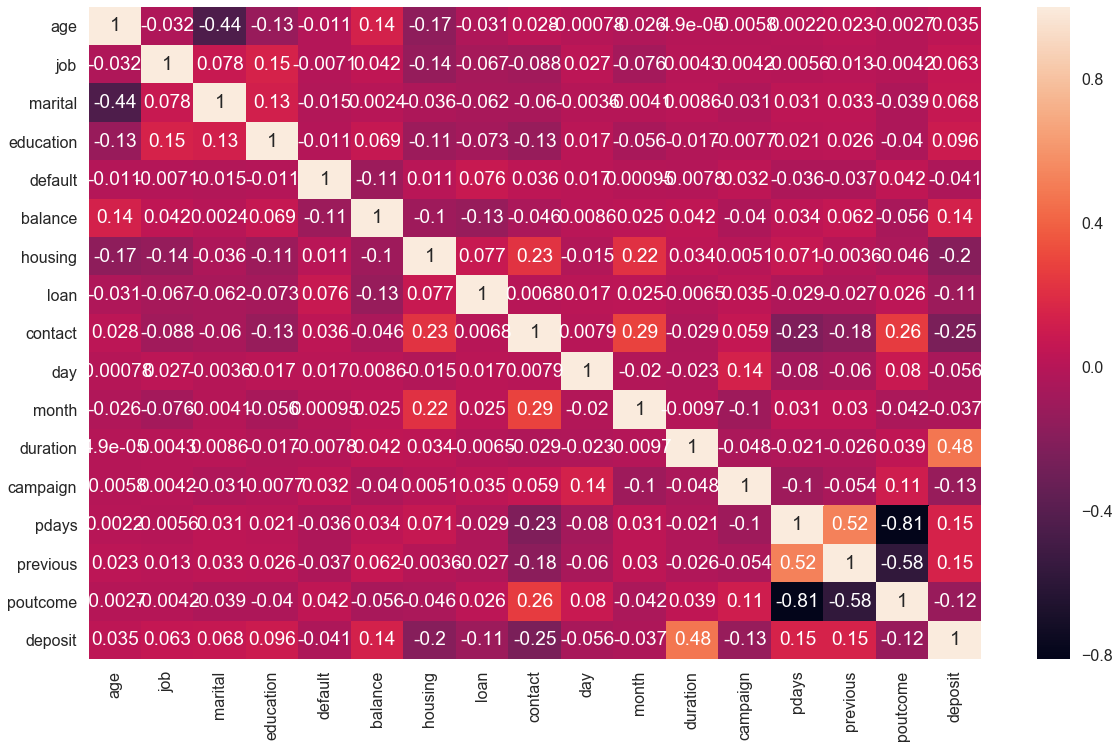

In [258]:
f, ax = plt.subplots(figsize=(20, 12))
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True)

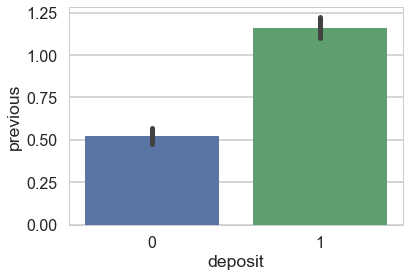

In [259]:
ax = sns.barplot(x="deposit", y="previous", data=df)

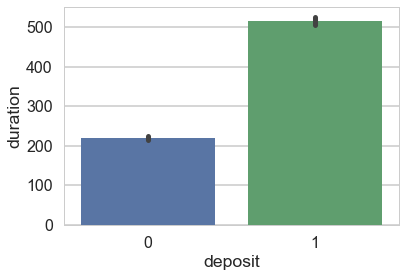

In [260]:
ax = sns.barplot(x="deposit", y="duration", data=df)

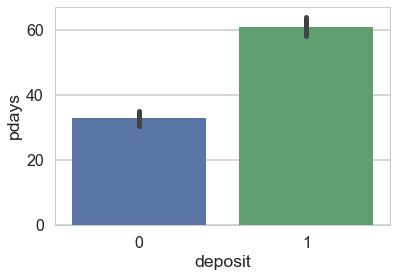

In [261]:
ax = sns.barplot(x="deposit", y="pdays", data=df)

In [262]:
#drop_elements = ['age','job','balance',"contact",'day','month','poutcome','deposit',"marital","education","default","housing","loan","campaign"]
y = df["deposit"]
X = pd.DataFrame(np.c_[df['duration'],df["pdays"],df["previous"],df["education"],df["balance"],df["housing"],df["loan"],df["contact"]],
                 columns = ['duration','pdays','previous','education','balance','housing','loan','contact'])
X.head()


,duration,pdays,previous,education,balance,housing,loan,contact
0,1021,0,0,1,2288,1,0,2
1,1283,0,0,1,469,0,0,2
2,1246,0,0,1,1618,1,0,2
3,577,0,0,1,2356,1,0,2
4,671,0,0,2,608,0,0,2


In [263]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
score_logreg = logreg.score(X_test,y_test)
print('The accuracy of the Logistic Regression is', score_logreg)

The accuracy of the Logistic Regression is 0.790416480072


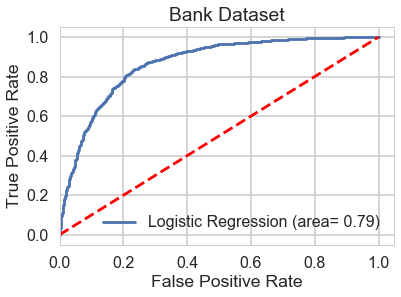

In [264]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc=roc_auc_score(y_test,logreg.predict(X_test))
fpr,tpr,thresholds=roc_curve(y_test,logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression (area= %0.2f)' %logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0, 1.0])
plt.xlim([0.0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Bank Dataset')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()